#                                       PROJECT



In [1]:
# IMPORTING THE NECESSARY LIBRARIES

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Observing and studying the characteristics of given data

In [2]:
df1 = pd.read_csv(r"../MyCall_Data_September_2023.csv")
df = df1.copy()
df.head(10)

,operator,technology,download,speed_kbps,signal_strength,lsa
0,JIO,4G,download,78645,-90,Andhra Pradesh
1,JIO,4G,upload,4811,-82,UP East
2,JIO,4G,download,5672,-102,West Bengal
3,JIO,4G,upload,8287,-90,Punjab
4,AIRTEL,4G,upload,27625,-72,Haryana
5,JIO,4G,download,21646,-101,Andhra Pradesh
6,JIO,4G,download,63238,-90,Andhra Pradesh
7,JIO,4G,upload,22713,-94,Haryana
8,JIO,4G,download,28823,-76,Haryana
9,JIO,4G,upload,4094,-90,UP West


In [3]:
print(df.shape)

(615500, 6)


In [4]:
print(df.columns)

Index(['operator', 'technology', 'download', 'speed_kbps', 'signal_strength',
       'lsa'],
      dtype='object')


In [5]:
df.sample(5)

,operator,technology,download,speed_kbps,signal_strength,lsa
510970,JIO,4G,upload,3068,-90,Gujarat
99725,JIO,4G,upload,155,-88,Haryana
403496,JIO,4G,upload,2908,-101,Tamil Nadu
536197,AIRTEL,4G,download,3455,-109,Haryana
383051,AIRTEL,4G,upload,575,-86,Haryana


In [6]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615500 entries, 0 to 615499
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   operator         615500 non-null  object
 1   technology       615500 non-null  object
 2   download         615500 non-null  object
 3   speed_kbps       615500 non-null  int64 
 4   signal_strength  615500 non-null  object
 5   lsa              615500 non-null  object
dtypes: int64(1), object(5)
memory usage: 28.2+ MB
None


In [7]:
print(df['operator'].unique())

['JIO' 'AIRTEL' 'CELLONE' 'Vi India']


In [8]:
print(df['technology'].unique())

['4G' '3G']


In [9]:
print(df['lsa'].unique())

['Andhra Pradesh' 'UP East' 'West Bengal' 'Punjab' 'Haryana' 'UP West'
 'Gujarat' 'Karnataka' 'Kerala' 'Kolkata' 'Delhi' 'Maharashtra' 'Bihar'
 'Mumbai' 'Tamil Nadu' 'Rajasthan' 'Himachal Pradesh' 'Chennai'
 'Madhya Pradesh' 'Orissa' 'North East' 'Assam' 'Jammu & Kashmir']


### Converting signal strength to be represented in terms of bars (as in smartphones ) which is convenient

In [10]:
def signal_strength_bar(ob):
    if ob!='na':
        ob=int(ob)
        if ob<= -110:
            return 0
        elif ob<=-100 and ob>-110:
            return 1
        elif ob<=-90 and ob>-100:
            return 2
        elif ob<=-80 and ob>-90:
            return 3
        elif ob<=-50 and ob>-80:
            return 4
    elif ob== 'na':
        return 'na'



df['signal_strength']=df['signal_strength'].apply(signal_strength_bar) 

In [11]:
print(df['signal_strength'].value_counts())

signal_strength
2     263095
1     158315
3      83590
4      45021
na     33784
0      31695
Name: count, dtype: int64


In [12]:
print(df.isnull().sum())

operator           0
technology         0
download           0
speed_kbps         0
signal_strength    0
lsa                0
dtype: int64


In [13]:
df.sample(10)

,operator,technology,download,speed_kbps,signal_strength,lsa
329557,AIRTEL,4G,download,3820,2,Haryana
79206,JIO,4G,download,2057,na,Haryana
539031,JIO,4G,download,57091,2,Kolkata
105018,AIRTEL,4G,download,10260,3,Haryana
408755,AIRTEL,4G,download,77603,2,Karnataka
119595,AIRTEL,4G,upload,6022,1,Kerala
179326,JIO,4G,download,2337,1,Madhya Pradesh
3777,AIRTEL,4G,upload,1630,3,Haryana
349652,AIRTEL,4G,download,1189,na,Haryana
138948,JIO,4G,upload,9624,2,Punjab


### Removing the rows with 'na' values as they are a very small fraction of our dataset

In [14]:
df = df.drop(df[df['signal_strength'] == 'na'].index)

In [15]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 581716 entries, 0 to 615499
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   operator         581716 non-null  object
 1   technology       581716 non-null  object
 2   download         581716 non-null  object
 3   speed_kbps       581716 non-null  int64 
 4   signal_strength  581716 non-null  object
 5   lsa              581716 non-null  object
dtypes: int64(1), object(5)
memory usage: 31.1+ MB
None


In [16]:
print(df.shape)

(581716, 6)


In [17]:
print(df['signal_strength'].value_counts())

signal_strength
2    263095
1    158315
3     83590
4     45021
0     31695
Name: count, dtype: int64


## Data Analysis Begins

Text(0, 0.5, 'Number of Users')

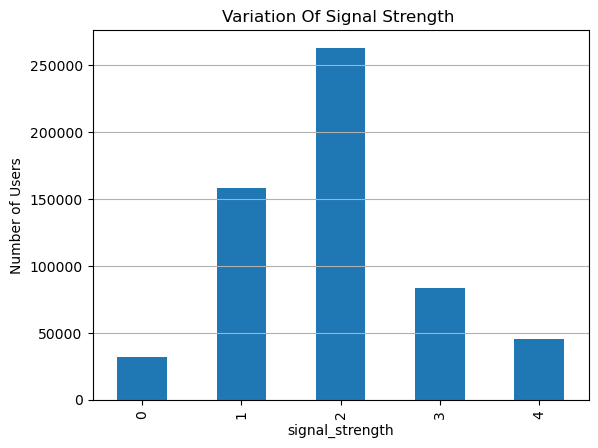

In [18]:
df['signal_strength'].value_counts().sort_index().plot(kind='bar')
plt.title("Variation Of Signal Strength ")
plt.grid(axis='y')
plt.ylabel('Number of Users')

In [19]:
# Inference drawn from above graph is :

print("Maximum numbers of users in India get the signal strength of 2 which is also the average signal strength in India.")

Maximum numbers of users in India get the signal strength of 2 which is also the average signal strength in India.


Text(0, 0.5, 'Number of Users getting signal strength of 4')

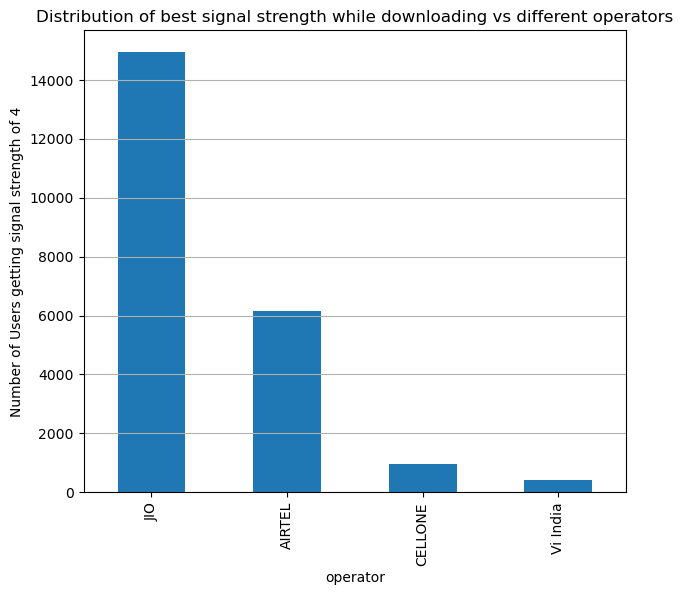

In [20]:
plt.figure(figsize=(7,6))
x1=df[df['download']=='download']
x1[x1['signal_strength']==4].value_counts('operator').plot(kind='bar')
plt.title("Distribution of best signal strength while downloading vs different operators")
plt.grid(axis='y')
plt.ylabel('Number of Users getting signal strength of 4')

Text(0, 0.5, 'Number of Users getting signal strength of 2')

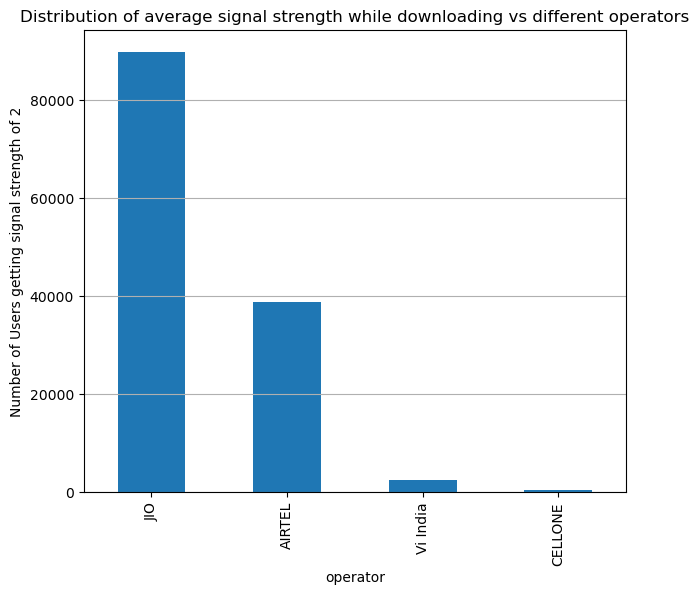

In [21]:
plt.figure(figsize=(7,6))
x1=df[df['download']=='download']
t=x1['signal_strength'].mean()
x1[x1['signal_strength']==round(t)].value_counts('operator').plot(kind='bar')
plt.title("Distribution of average signal strength while downloading vs different operators")
plt.grid(axis='y')
plt.ylabel('Number of Users getting signal strength of 2')

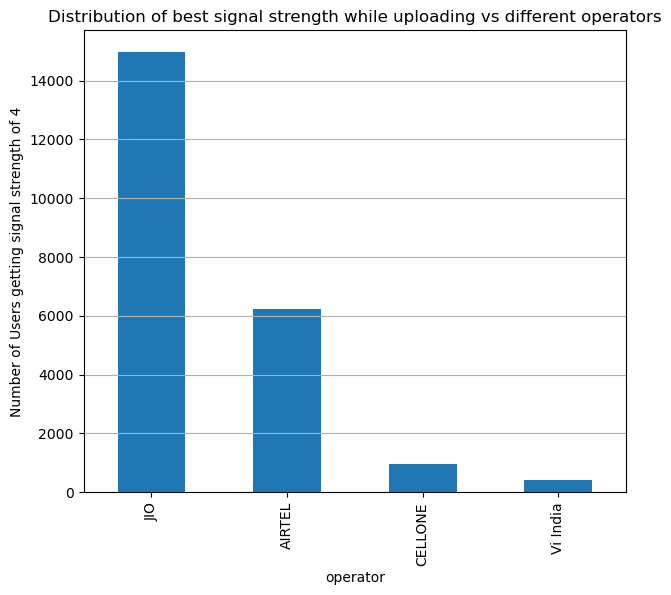

In [22]:
plt.figure(figsize=(7,6))
x2=df[df['download']=='upload']
x2[x2['signal_strength']==4].value_counts('operator').plot(kind='bar')
plt.title("Distribution of best signal strength while uploading vs different operators")
plt.ylabel('Number of Users getting signal strength of 4')
plt.grid(axis='y')

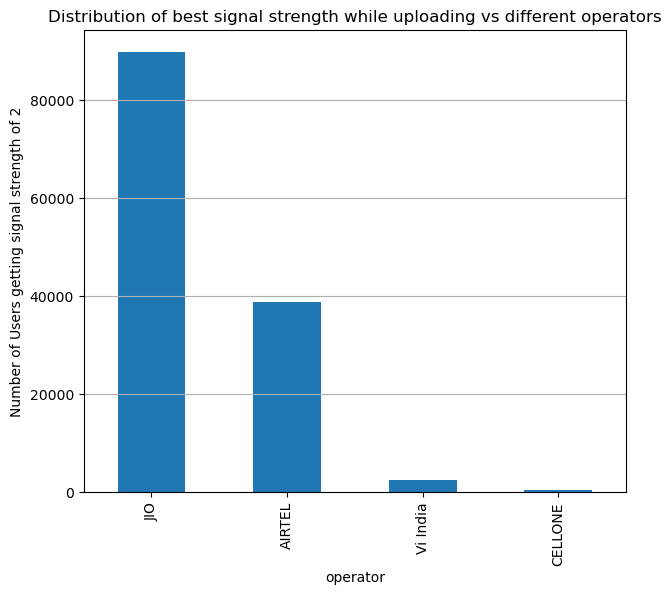

In [23]:
plt.figure(figsize=(7,6))
x3=df[df['download']=='upload']
t=x3['signal_strength'].mean()
x1[x1['signal_strength']==round(t)].value_counts('operator').plot(kind='bar')
plt.title("Distribution of best signal strength while uploading vs different operators")
plt.ylabel('Number of Users getting signal strength of 2')
plt.grid(axis='y')

In [24]:
# Inferences drawn from above graphs are :

print("Jio is overall the best operator providing good signal strengths both while downloading and uploading.")
print("Cellone provides better uploading speeds than Vi India network operator.")


Jio is overall the best operator providing good signal strengths both while downloading and uploading.
Cellone provides better uploading speeds than Vi India network operator.


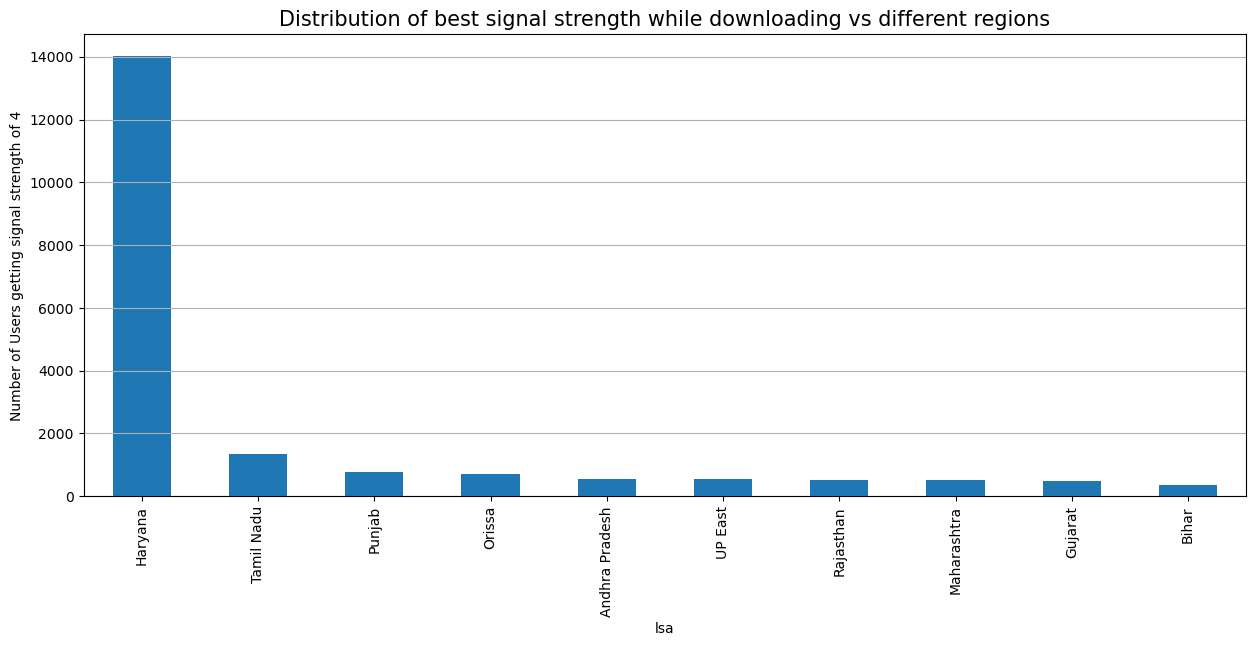

In [25]:
plt.figure(figsize=(15,6))
x1=df[df['download']=='download']
x1[x1['signal_strength']==4].value_counts('lsa')[:10].plot(kind='bar')
plt.title("Distribution of best signal strength while downloading vs different regions",fontsize=15)
plt.ylabel('Number of Users getting signal strength of 4')
plt.grid(axis='y')

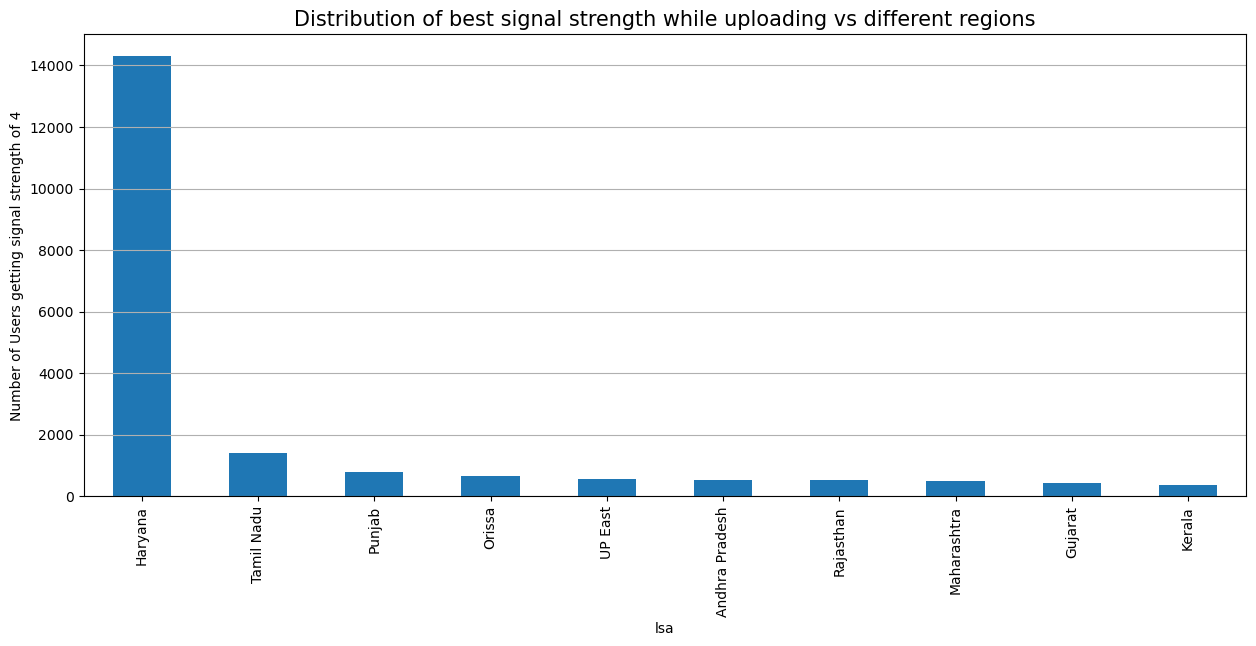

In [26]:
plt.figure(figsize=(15,6))
x2=df[df['download']=='upload']
x2[x2['signal_strength']==4].value_counts('lsa')[:10].plot(kind='bar')
plt.title("Distribution of best signal strength while uploading vs different regions",fontsize=15)
plt.ylabel('Number of Users getting signal strength of 4')
plt.grid(axis='y')

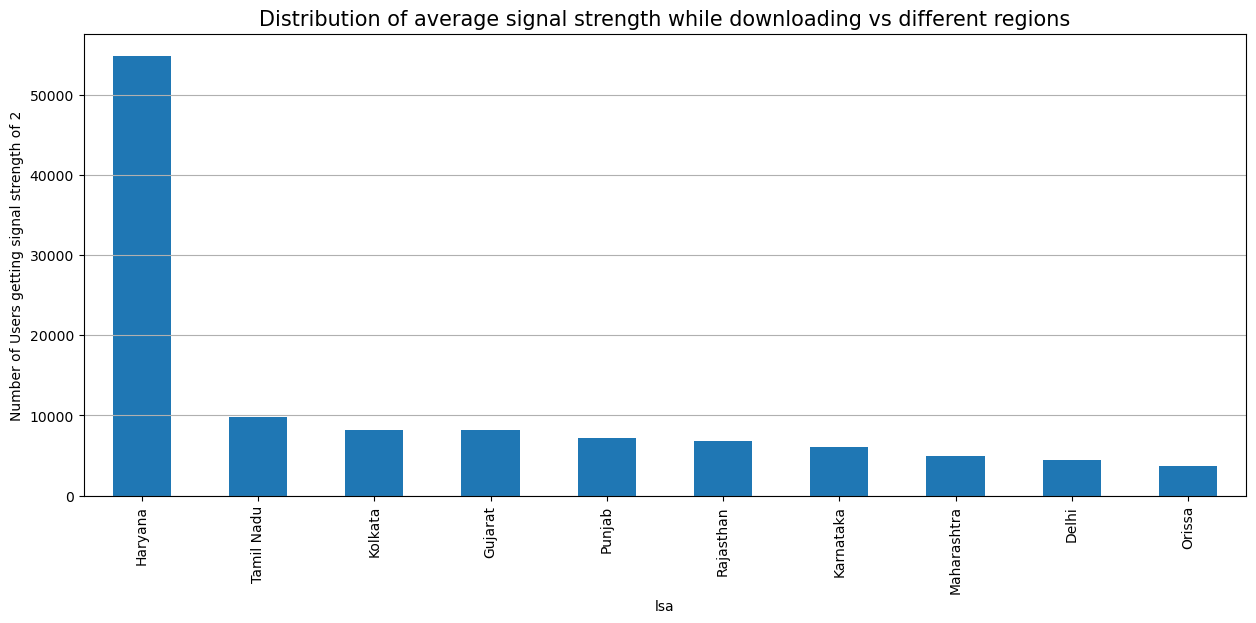

In [27]:
plt.figure(figsize=(15,6))
x1=df[df['download']=='download']
t=x1['signal_strength'].mean()
x1[x1['signal_strength']==round(t)].value_counts('lsa')[:10].plot(kind='bar')
plt.title("Distribution of average signal strength while downloading vs different regions",fontsize=15)
plt.ylabel('Number of Users getting signal strength of 2')
plt.grid(axis='y')

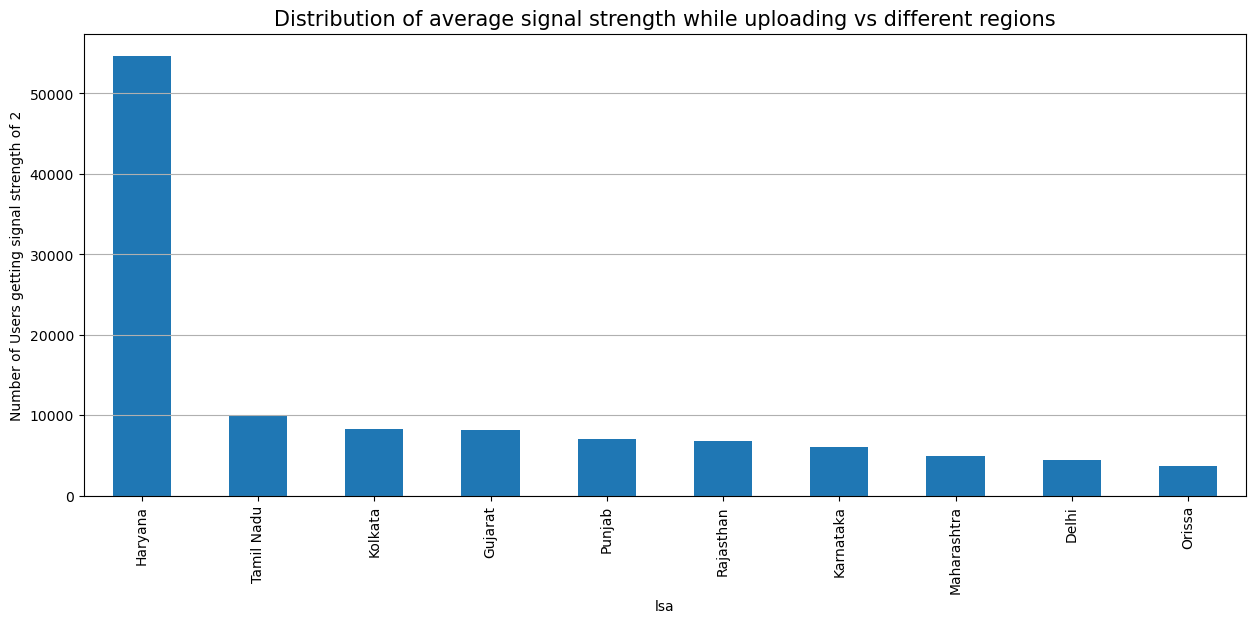

In [28]:
plt.figure(figsize=(15,6))
x3=df[df['download']=='upload']
t=x3['signal_strength'].mean()
x3[x3['signal_strength']==round(t)].value_counts('lsa')[:10].plot(kind='bar')
plt.title("Distribution of average signal strength while uploading vs different regions",fontsize=15)
plt.ylabel('Number of Users getting signal strength of 2')
plt.grid(axis='y')

In [29]:
# Inferences drawn from above graphs are :

print("Haryana leads amongst all other states with the greatest number of users getting good signal strength network while downloading and uploading.")
print("Kolkata has lower signal strength of 2 than Punjab,Orrisa,UP etc.")



Haryana leads amongst all other states with the greatest number of users getting good signal strength network while downloading and uploading.
Kolkata has lower signal strength of 2 than Punjab,Orrisa,UP etc.


Text(0, 0.5, 'Number of Users')

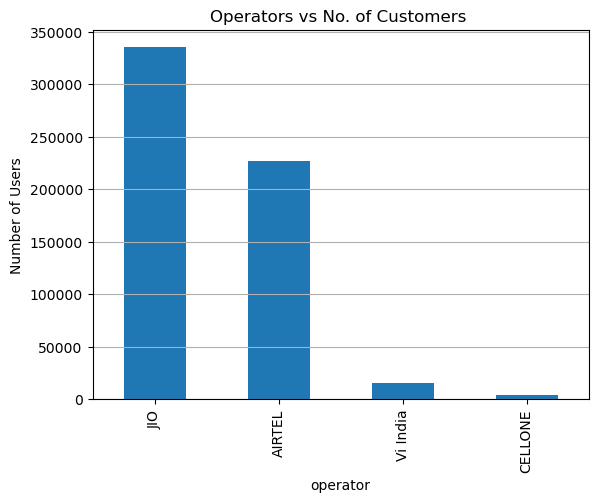

In [30]:
df['operator'].value_counts().plot(kind='bar')
plt.title("Operators vs No. of Customers ")
plt.grid(axis='y')
plt.ylabel('Number of Users')

In [31]:
# Inferences drawn from above graphs are :

print("Jio is overall the largest network operator in India followed by Airtel and Vi India.")


Jio is overall the largest network operator in India followed by Airtel and Vi India.


Text(0, 0.5, 'Number of Users')

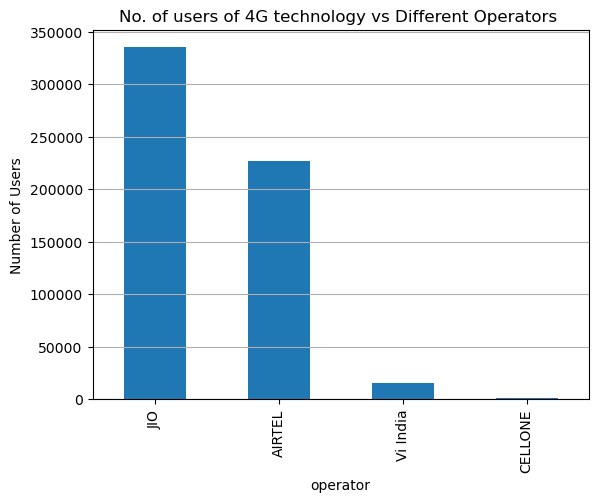

In [32]:
df[df['technology']=='4G']['operator'].value_counts().plot(kind='bar')
plt.grid(axis='y')
plt.title("No. of users of 4G technology vs Different Operators ")
plt.ylabel('Number of Users')

Text(0, 0.5, 'Number of Users')

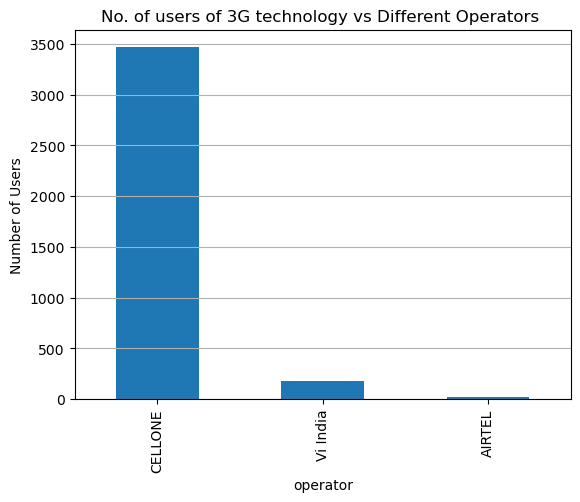

In [33]:
plt.title("No. of users of 3G technology vs Different Operators ")
df[df['technology']=='3G']['operator'].value_counts().plot(kind='bar')
plt.grid(axis='y')
plt.title("No. of users of 3G technology vs Different Operators ")
plt.ylabel('Number of Users')

In [34]:
# Inferences drawn from above graphs are :

print("Cellone emerges as the most popular 3G operator but is the least popular in the 4G sector.")
print("Jio does not provides 3G network in India.")


Cellone emerges as the most popular 3G operator but is the least popular in the 4G sector.
Jio does not provides 3G network in India.


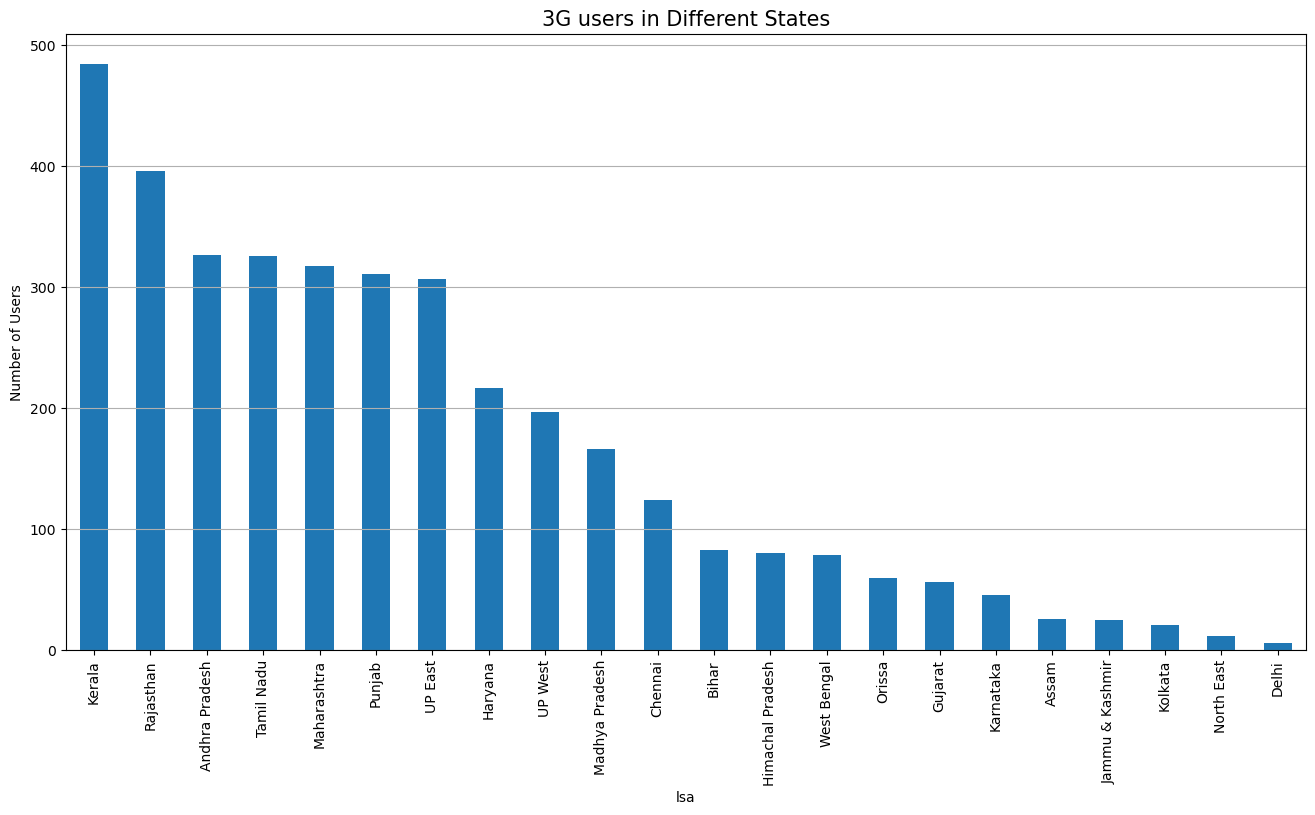

In [35]:
plt.figure(figsize=(16,8))
df[df['technology']=='3G']['lsa'].value_counts().plot(kind='bar')
plt.title("3G users in Different States",fontsize=15)
plt.ylabel('Number of Users')
plt.grid(axis='y')

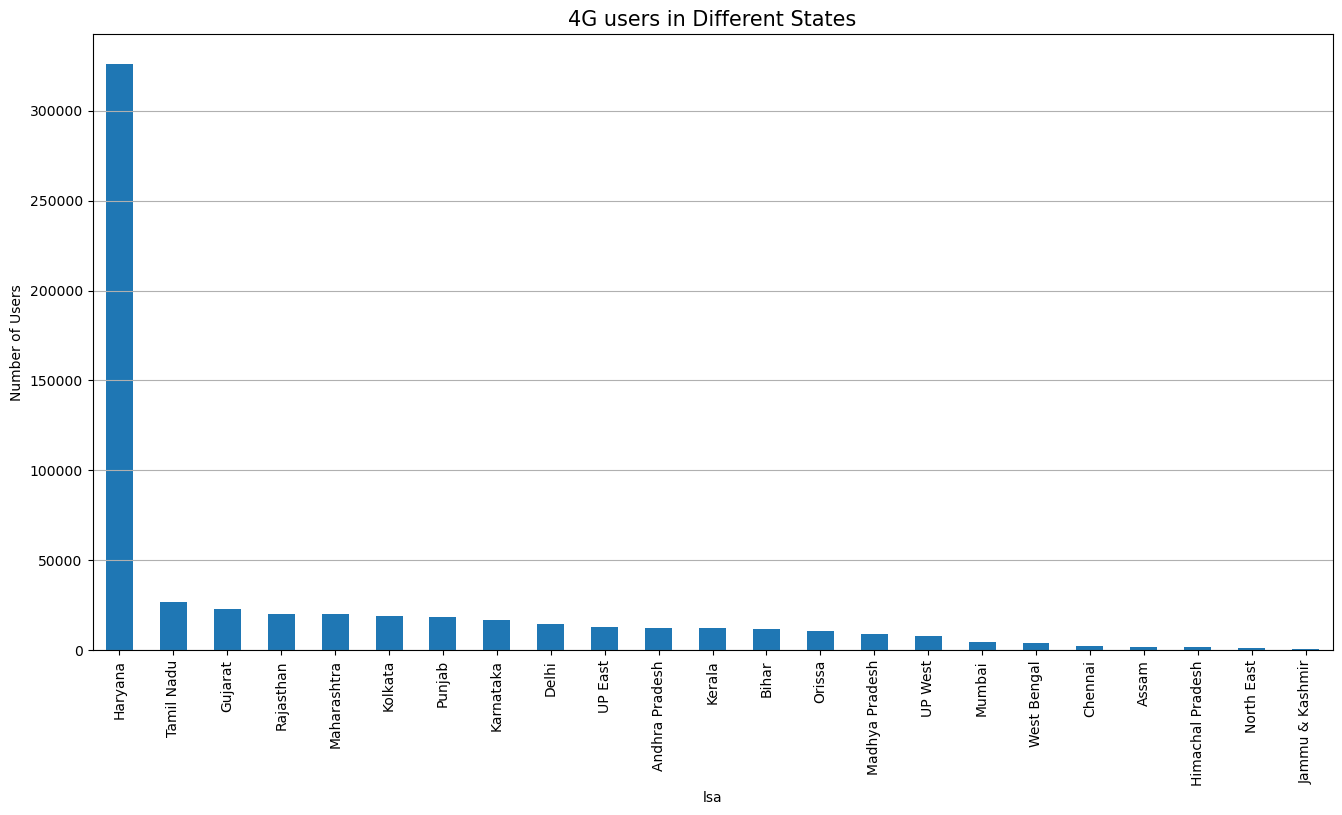

In [36]:
plt.figure(figsize=(16,8))
df[df['technology']=='4G']['lsa'].value_counts().plot(kind='bar')
plt.title("4G users in Different States",fontsize=15)
plt.ylabel('Number of Users')
plt.grid(axis='y')

In [37]:
# Inferences drawn from above graphs are :

print("Kerala has the highest number of 3G users followed by Rajasthan and Andhra Pradesh.")
print("Haryana has the highest number of 4G users followed by Tamil Nadu and Gujrat.")

Kerala has the highest number of 3G users followed by Rajasthan and Andhra Pradesh.
Haryana has the highest number of 4G users followed by Tamil Nadu and Gujrat.


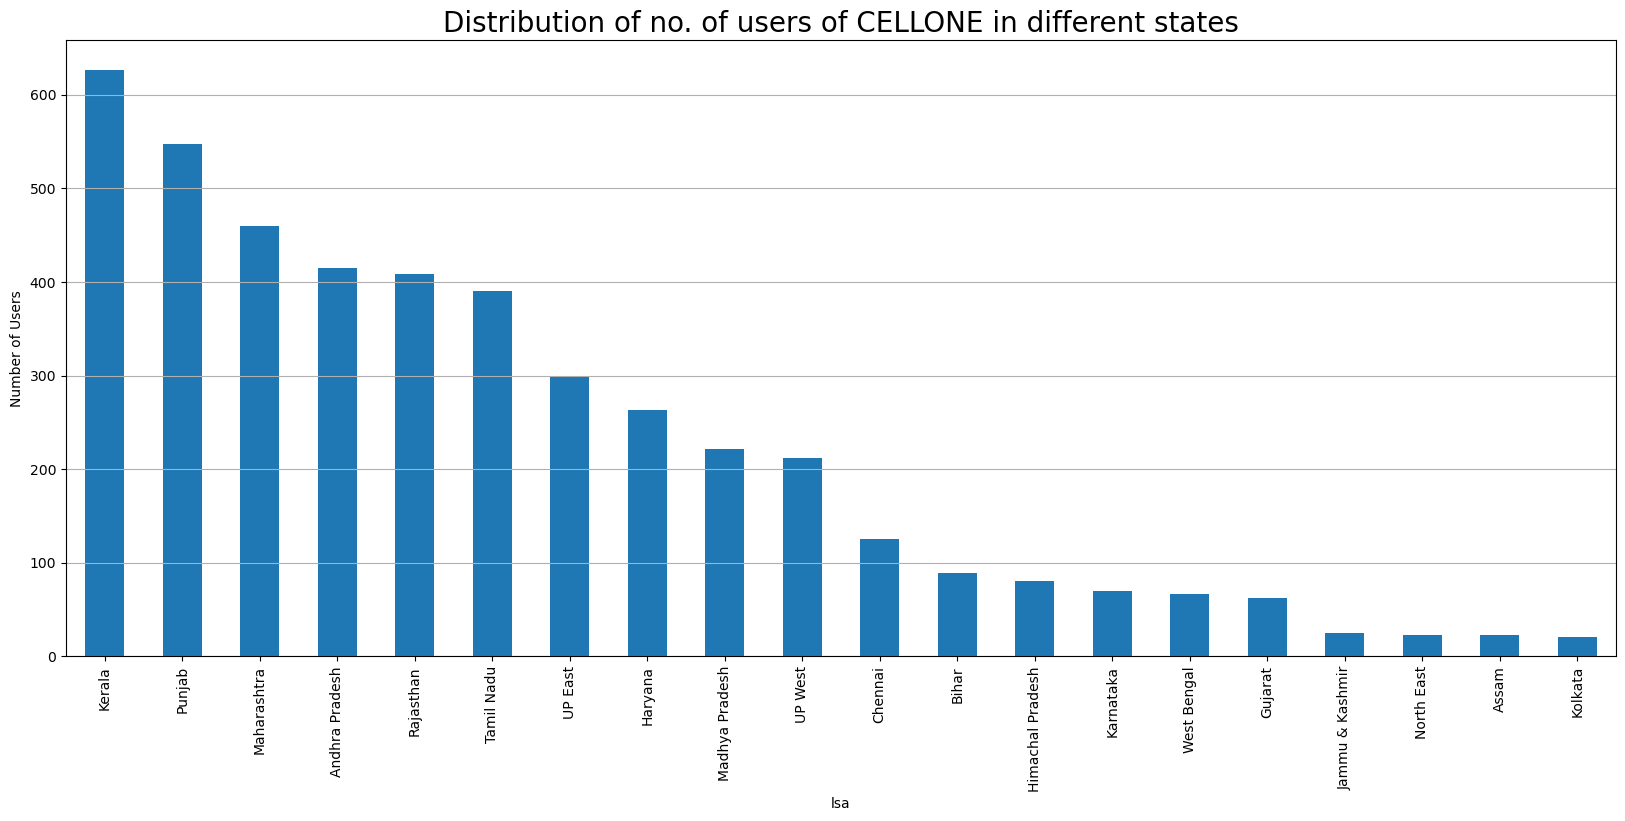

In [38]:
#state wise USERS of CELLONE

plt.figure(figsize=(20,8))
t1=df[df['operator']=='CELLONE']
t1.value_counts('lsa').plot(kind='bar')
plt.title("Distribution of no. of users of CELLONE in different states",fontsize=20)
plt.ylabel('Number of Users')
plt.grid(axis='y')

In [39]:
# Inferences drawn from above graph are :

print("Cellone is the most popular network in Kerala followed by Punjab and Maharahstra.")

Cellone is the most popular network in Kerala followed by Punjab and Maharahstra.


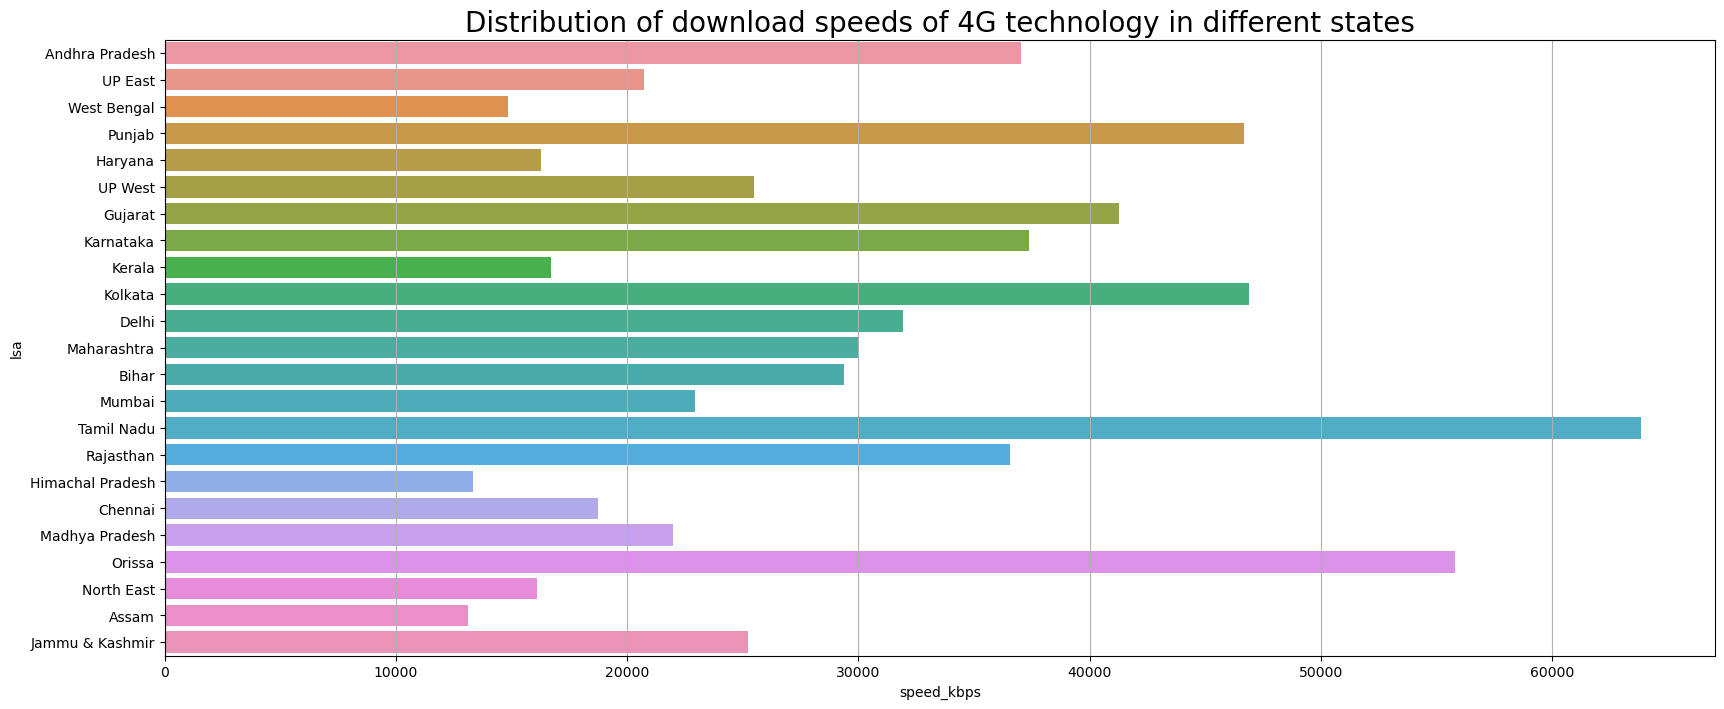

In [40]:
plt.figure(figsize=(20,8))
t1=df[df['technology']=='4G']
t1=t1[t1['download']=='download']['speed_kbps']
sns.barplot(data=df, x= t1, y = 'lsa',errorbar=None)
plt.title("Distribution of download speeds of 4G technology in different states",fontsize=20)
plt.grid(axis='x')

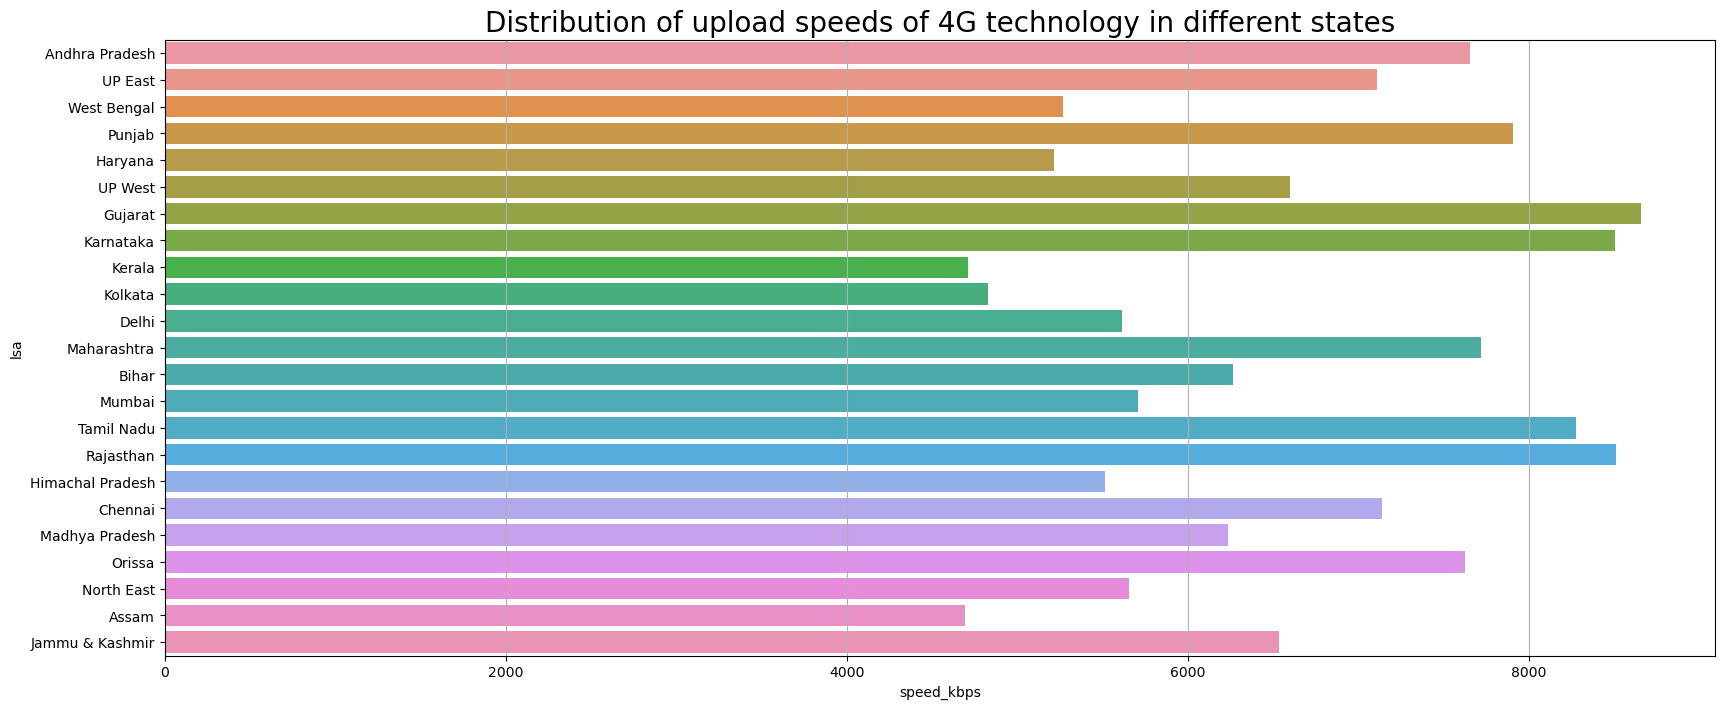

In [41]:
plt.figure(figsize=(20,8))
t1=df[df['technology']=='4G']
t1=t1[t1['download']=='upload']['speed_kbps']
sns.barplot(data=df, x= t1, y = 'lsa',errorbar=None)
plt.title("Distribution of upload speeds of 4G technology in different states",fontsize=20)
plt.grid(axis='x')

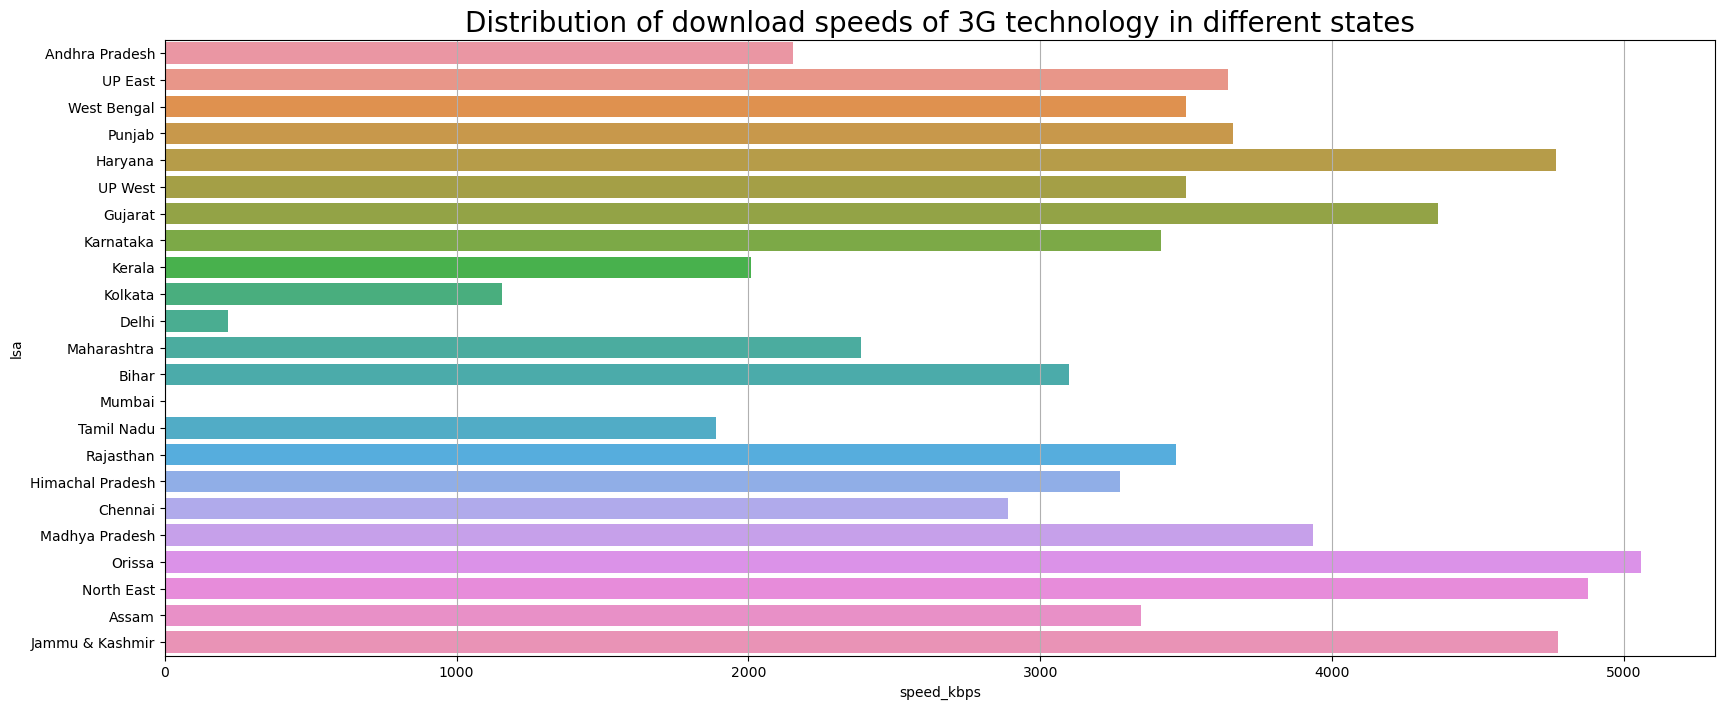

In [42]:
plt.figure(figsize=(20,8))
t2=df[df['technology']=='3G']
t2=t2[t2['download']=='download']['speed_kbps']
sns.barplot(data=df, x= t2, y = 'lsa',errorbar=None)
plt.title("Distribution of download speeds of 3G technology in different states",fontsize=20)
plt.grid(axis='x')

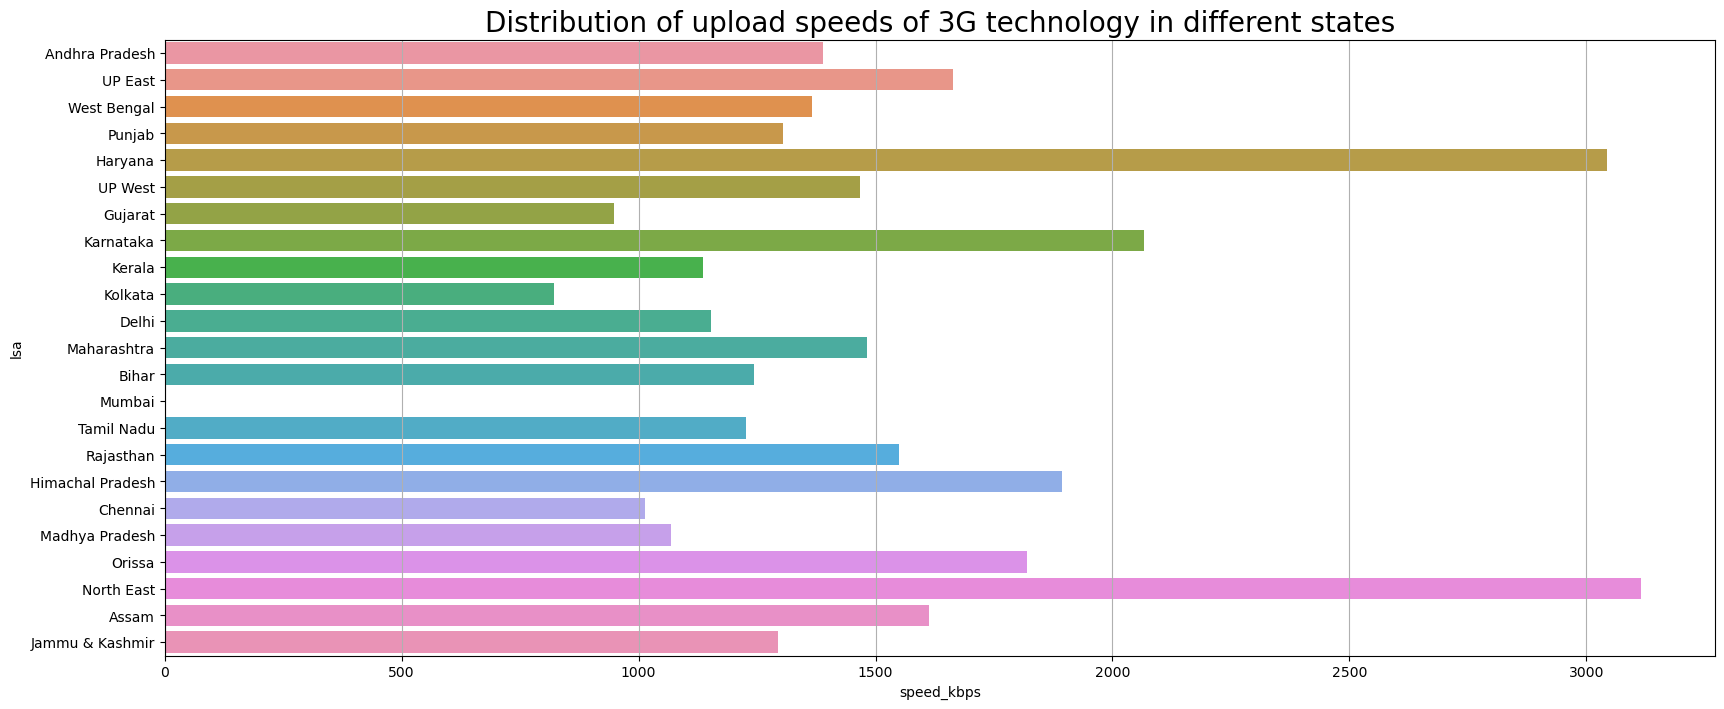

In [43]:
plt.figure(figsize=(20,8))
t2=df[df['technology']=='3G']
t2=t2[t2['download']=='upload']['speed_kbps']
sns.barplot(data=df, x= t2, y = 'lsa',errorbar=None)
plt.title("Distribution of upload speeds of 3G technology in different states",fontsize=20)
plt.grid(axis='x')

In [44]:
# Inferences drawn from above graphs are :

print("Tamil Nadu followed by Orrisa have the highest download speed while using 4G.")
print("Gujrat followed by Rajasthan and Karnataka have the highest upload speed while using 4G.")
print("Orrisa followed by North Eastern States have the highest download speed while using 3G.")
print("North Eastern States followed by Haryana have the highest upload speed while using 3G.")
print("Mumbai has no user of 3G.")

Tamil Nadu followed by Orrisa have the highest download speed while using 4G.
Gujrat followed by Rajasthan and Karnataka have the highest upload speed while using 4G.
Orrisa followed by North Eastern States have the highest download speed while using 3G.
North Eastern States followed by Haryana have the highest upload speed while using 3G.
Mumbai has no user of 3G.


Text(0, 0.5, 'Mean Download speed')

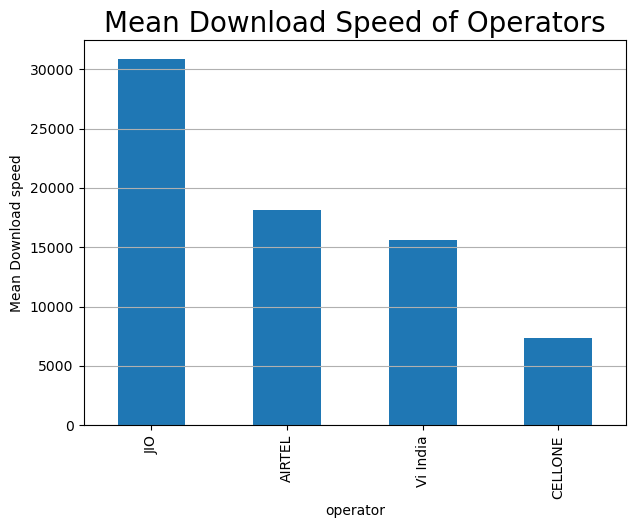

In [45]:
plt.figure(figsize=(7,5))
t1=df[df['technology']=='4G']
t1=t1[t1['download']=='download'].groupby(t1['operator'])
t1['speed_kbps'].mean().sort_values(ascending=False).plot(kind='bar')
plt.title("Mean Download Speed of Operators",fontsize=20)
plt.grid(axis='y')
plt.ylabel('Mean Download speed')

In [46]:
# Inferences drawn from above graphs are :

print("Jio provides the highest mean download speeds to its users.")

Jio provides the highest mean download speeds to its users.
